In [2]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
sns.set()
%matplotlib inline
from datetime import date
import scipy.stats as stats

In [1]:
df = pd.read_csv('D:/SALES/MY/SuperStore_Orders.csv', encoding='latin-1') 
df.head(1)

NameError: name 'pd' is not defined

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [102]:
# Kiểm tra giá trị trùng
df[df.duplicated()]
check_duplicate = df.duplicated().sum()
print(check_duplicate)

0


In [103]:
# Kiểm tra giá trị bị null
check_null_values = df.isnull().sum()
print(check_null_values)

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


In [104]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


Khoảng dữ liệu của các phân vị 25%, 50%, 75% khá nhỏ nên ta có thể thấy dữ liệu tập trung chặt chẽ xung quanh một khoảng giá trị nhất định. Và sự chênh lệch lớn giữa giá trị tối đa và Q3 (hoặc giá trị 75%) trong các cột này cho thấy có giá trị outlier trong dữ liệu. Nhưng ta cần kiểm chứng thêm bằng các phương pháp khác như box plot.

In [105]:
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales              2246
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

Kiểm tra outliers các cột dữ liệu và loại bỏ outliers

<Axes: >

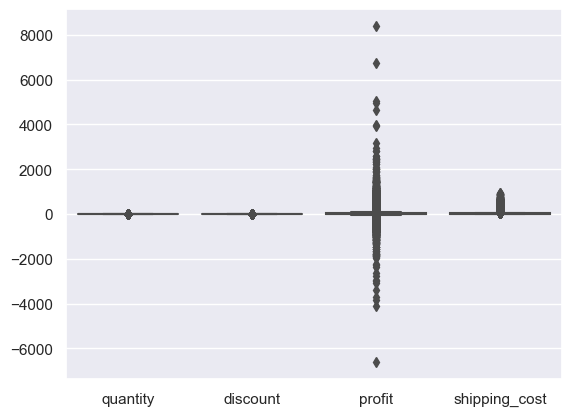

In [106]:
check_outliners = df[['quantity', 'discount', 'profit', 'shipping_cost']]
sns.boxplot(data=check_outliners)

In [107]:
# Hàm để loại bỏ outliers dựa trên percentiles
def remove_outliers(df, col_name, lower_percentile, upper_percentile):
    lower_limit = df[col_name].quantile(lower_percentile)
    upper_limit = df[col_name].quantile(upper_percentile)
    return df[(df[col_name] >= lower_limit) & (df[col_name] <= upper_limit)]

# Thiết lập percentiles bạn muốn sử dụng (ví dụ: loại bỏ 1% outliers dưới và 99% outliers trên)
lower_percentile = 0.01
upper_percentile = 0.99

# Loại bỏ outliers cho từng cột
columns_to_remove_outliers = ['quantity', 'discount', 'profit', 'shipping_cost']
for col in columns_to_remove_outliers:
    df = remove_outliers(df, col, lower_percentile, upper_percentile)

# Kết quả sau khi loại bỏ outliers
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,IN-2014-23754,31-12-2014,07-01-2015,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79,3,0.0,25.3800,1.41,Medium,2014
51284,MX-2014-108574,31-12-2014,04-01-2015,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",17,3,0.0,0.6600,1.32,Medium,2014
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014


In [108]:
# Chuyển cột 'sales' thành kiểu dữ liệu float
df['sales'] = df['sales'].str.replace(',', '', regex=False).astype(float)
print(df.dtypes)

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object


In [109]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')

C:\Users\ngoch\AppData\Local\Temp\ipykernel_8708\77709251.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order_date'] = df['order_date'].astype('datetime64[ns]')
C:\Users\ngoch\AppData\Local\Temp\ipykernel_8708\77709251.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ship_date'] = df['ship_date'].astype('datetime64[ns]')


# 1. TIME ANALYST

### 1.1 Xu hướng của doanh thu theo năm ###

In [76]:
yearly_sales = df.groupby('year')['sales'].sum().reset_index()
yearly_sales

,year,sales
0,2011,1675056.0
1,2012,2062396.0
2,2013,2576606.0
3,2014,3216172.0


In [75]:
yearly_sales = df.groupby('year')['sales'].sum().reset_index()
total_sales = yearly_sales['sales'].sum()
yearly_sales['percentage'] = (yearly_sales['sales'] / total_sales) * 100

yearly_sales['growth_percentage'] = yearly_sales['sales'].pct_change() * 100
yearly_sales['growth_percentage'] = yearly_sales['percentage'].diff().fillna(0)

print(yearly_sales)

   year      sales  percentage  growth_percentage
0  2011  1675056.0   17.576239           0.000000
1  2012  2062396.0   21.640569           4.064330
2  2013  2576606.0   27.036137           5.395568
3  2014  3216172.0   33.747055           6.710919


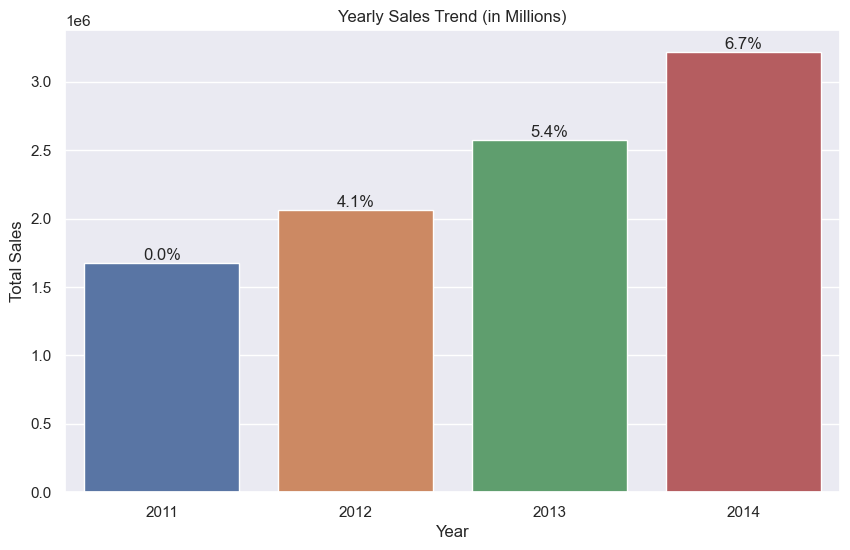

In [18]:
sns.set()
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='year', y='sales', data=yearly_sales)

# Thêm cột 'growth_percentage'
for index, row in yearly_sales.iterrows():
    ax.text(index, row['sales'], f'{row["growth_percentage"]:.1f}%', 
            ha='center', va='bottom', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend (in Millions)')

plt.show()

##### Kết luận  : Xu hướng của dữ liệu tăng tức tổng doanh thu tăng qua các năm #####

### 1.2 Tháng nào có doanh số cao nhất? So sánh với nhau với năm còn lại ###

In [77]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')
df['year'] = df['order_date'].dt.year 
df['month'] = df['order_date'].dt.month
monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()
print(monthly_sales)

    year  month     sales
0   2011      1  113522.0
1   2011      2  103848.0
2   2011      3  109272.0
3   2011      4  106303.0
4   2011      5  109625.0
5   2011      6  139571.0
6   2011      7  127569.0
7   2011      8  153147.0
8   2011      9  180252.0
9   2011     10  147244.0
10  2011     11  167660.0
11  2011     12  217043.0
12  2012      1  132352.0
13  2012      2  106603.0
14  2012      3  147380.0
15  2012      4  141339.0
16  2012      5  166791.0
17  2012      6  187830.0
18  2012      7  138097.0
19  2012      8  199593.0
20  2012      9  215490.0
21  2012     10  190021.0
22  2012     11  219530.0
23  2012     12  217370.0
24  2013      1  151113.0
25  2013      2  125455.0
26  2013      3  164617.0
27  2013      4  171057.0
28  2013      5  217904.0
29  2013      6  263002.0
30  2013      7  179352.0
31  2013      8  251100.0
32  2013      9  273007.0
33  2013     10  215332.0
34  2013     11  290873.0
35  2013     12  273794.0
36  2014      1  187619.0
37  2014    

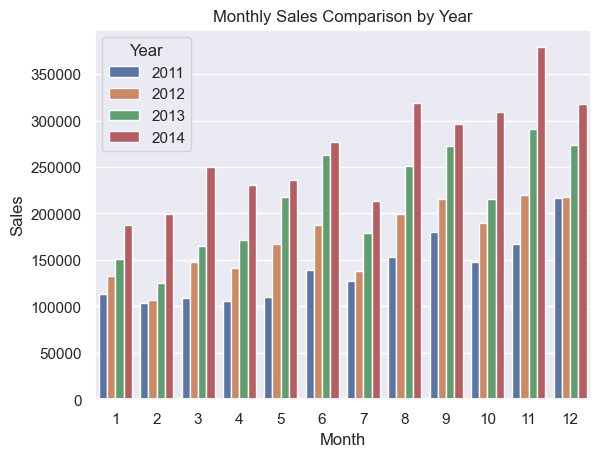

In [21]:
sns.set()
sns.barplot(data=monthly_sales, x='month', y='sales', hue='year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Comparison by Year')
plt.legend(title='Year')
plt.show()

##### Kết luận: #####
##### Những tháng có doanh thu cao tập trung ở những tháng cuối của năm (tháng 7, 8, 9, 10, 11, 12). Điều này có thể chỉ ra một số xu hướng quan trọng:  #####
##### 1. Mùa lễ hội và mua sắm cuối năm: Tháng 11 và 12 thường chứa các ngày lễ và sự kiện mua sắm quan trọng như Black Friday, Cyber Monday và Giáng sinh. Điều này thúc đẩy sự tiêu dùng và tạo ra doanh thu cao hơn. #####
##### 2. Kết thúc năm tài chính: Một số doanh nghiệp và tổ chức có thể kết thúc năm tài chính của họ vào tháng 12, điều này có thể dẫn đến việc tăng cường công việc kế toán và ghi nhận doanh thu vào cuối năm. #####
##### 3. Thời tiết và mùa vụ: Tháng 7, 8, và 9 thường là mùa hè hoặc mùa thu ở một số quốc gia, điều này có thể ảnh hưởng đến hoạt động kinh doanh trong ngành như du lịch hoặc thực phẩm. #####
##### Có thể điều chỉnh chiến lược ra mắt sản phẩm mới hay chiến lược quảng cáo hiệu quả vào khoảng thời gian này để tối ưu hóa doanh thu và lợi nhuận. #####

### 1.3 Sử dụng cột order_date và ship_date để tính toán thời gian giao hàng của mỗi đơn hàng và xem xét thời gian giao hàng dựa trên các phương thức vận chuyển khác nhau để xác định phương thức nào giao hàng nhanh nhất. ###

In [22]:
#Chuyển đổi cột order_date và ship_date thành kiểu datetime
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')
#Trừ hai cột ngày
df['delivery_time'] = df['ship_date'] - df['order_date']
df['delivery_time'] = df['delivery_time'].dt.days           #chuyển dữ liệu từ timedelta thành int
print(df['delivery_time'] )

0        151
1        212
2        120
3        120
4        212
        ... 
51283    182
51284     91
51285     91
51286    121
51287     32
Name: delivery_time, Length: 48551, dtype: int64


In [23]:
delivery_time_by_ship_mode = df.groupby('ship_mode')['delivery_time'].mean()

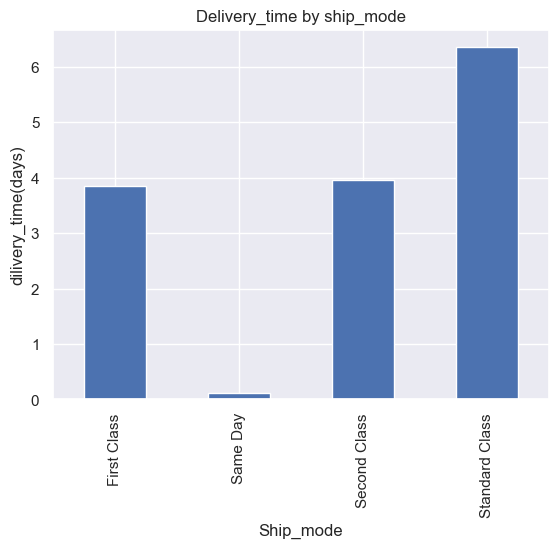

In [24]:
delivery_time_by_ship_mode.plot(kind='bar')
plt.title('Delivery_time by ship_mode')
plt.xlabel('Ship_mode')
plt.ylabel('dilivery_time(days)')
plt.show()

In [25]:
order_count_by_ship_mode = df.groupby('ship_mode')['order_id'].count()
order_count_by_ship_mode 

ship_mode
First Class        7000
Same Day           2518
Second Class       9733
Standard Class    29300
Name: order_id, dtype: int64

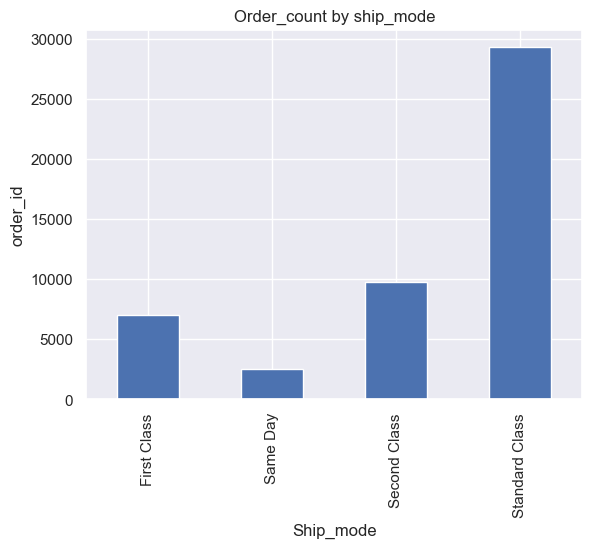

In [26]:
order_count_by_ship_mode.plot(kind='bar')
plt.title('Order_count by ship_mode')
plt.xlabel('Ship_mode')
plt.ylabel('order_id')
plt.show()

Mặc dù thời gian giao hàng của phương thức 'Standard Class' dài hơn, số lượng đơn hàng giao hàng bằng phương thức này là lớn nhất. Điều này cho thấy rằng khách hàng có thể ưa chuộng phương thức này vì lý do nào đó, có thể liên quan đến giá cước, sự tin cậy hoặc các yếu tố khác 

#### Xem xét giá cước có ảnh hưởng đến sự lựa chọn phương thức giao hàng của khách hàng ####

shipping_cost là biến phụ thuộc và ship_mode là biến độc lập

Lập giả thuyết:

H0: Giá cước không có ảnh hưởng đến sự lựa chọn phương thức giao hàng của khách hàng

H1: Giá cước có ảnh hưởng đến sự lựa chọn phương thức giao hàng của khách hàng

In [27]:
#Giá cước trung bình của từng phương thức giao hàng
shipping_cost_by_ship_mode = df.groupby('ship_mode')['shipping_cost'].mean()
shipping_cost_by_ship_mode

ship_mode
First Class       28.031109
Same Day          28.163987
Second Class      22.210677
Standard Class    16.400314
Name: shipping_cost, dtype: float64

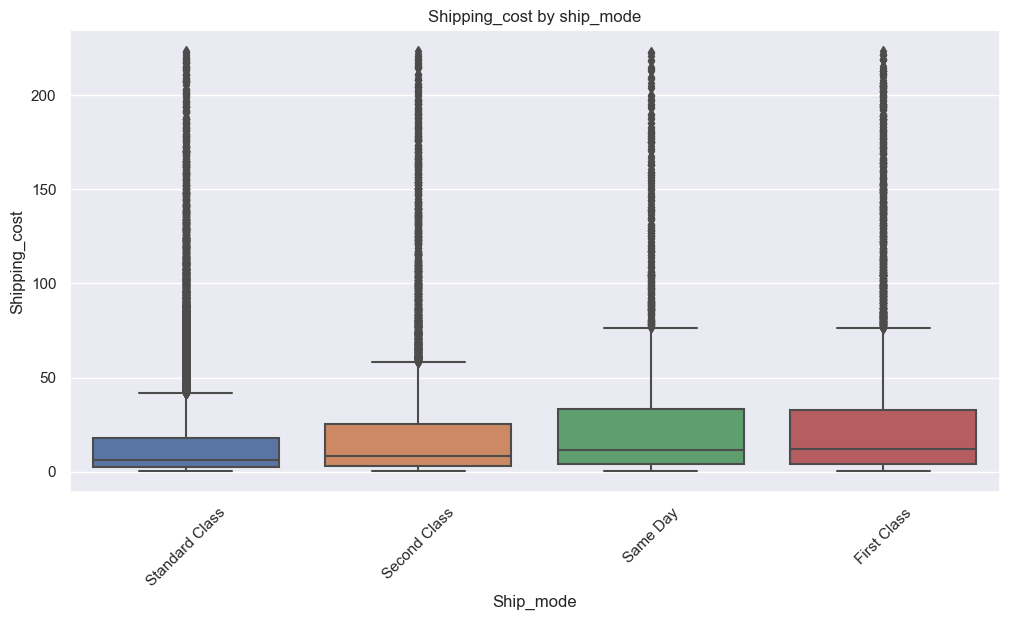

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ship_mode', y='shipping_cost', data=df)
plt.title('Shipping_cost by ship_mode')
plt.xlabel('Ship_mode')
plt.ylabel('Shipping_cost')
plt.xticks(rotation=45)
plt.show()

Các biểu đồ boxplot có hình dáng tương tự nhau và gần với phân phối chuẩn nên dữ liệu cột ship_mode và cột shipping_cost có thể gần với phân phối chuẩn.

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('shipping_cost ~ ship_mode', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq       df           F         PR(>F)
ship_mode  1.045484e+06      3.0  357.304636  1.520641e-229
Residual   4.734997e+07  48547.0         NaN            NaN


In [49]:
p_value = anova_table['PR(>F)']['ship_mode']
alpha = 0.05
if p_value < alpha:
    print("Giá cước có ảnh hưởng đáng kể đến sự lựa chọn phương thức giao hàng.")
else:
    print("Giá cước không có ảnh hưởng đáng kể đến sự lựa chọn phương thức giao hàng.")

Giá cước có ảnh hưởng đáng kể đến sự lựa chọn phương thức giao hàng.


#### Dự đoán thời gian giao hàng dự kiến bằng mô hình hồi quy tuyến tính ####

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Tiền xử lý dữ liệu (chỉ sử dụng một số cột liên quan)
df = df[['ship_date', 'ship_mode', 'sales', 'shipping_cost', 'delivery_time']]

# Tách biến phụ thuộc(y) và biến độc lập(x)
X = df[['ship_mode', 'sales', 'shipping_cost']]
y = df['delivery_time']

# Tạo biến giả cho biến hạng mục 'ship_mode'
X = pd.get_dummies(X, columns=['ship_mode'], drop_first=True)

# Tách tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán thời gian giao hàng trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 60.25870740552979


Dựa trên phân tích dữ liệu, có thể dự đoán rằng thời gian giao hàng trung bình dự kiến của các đơn hàng trong tương lai là khoảng 61 ngày. Điều này giúp lập kế hoạch và quản lý dự án hoặc cung cấp thông tin dự đoán cho khách hàng.

### 1.4 Phân tích lợi nhuận: Xem xét sự biến đổi của lợi nhuận theo thời gian và xem có mối quan hệ giữa lợi nhuận và doanh số bán hàng. ###

#### Phân tích lợi nhuận theo thời gian ####

In [78]:
yearly_profit = df.groupby('year')['profit'].sum().reset_index()
yearly_profit

,year,profit
0,2011,200571.87772
1,2012,268752.45642
2,2013,327552.07598
3,2014,407600.46634


In [79]:
yearly_profit = df.groupby('year')['profit'].sum().reset_index()
total_profit = yearly_profit['profit'].sum()
yearly_profit['percentage'] = (yearly_profit['profit'] / total_profit) * 100

yearly_profit['growth_percentage'] = yearly_profit['profit'].pct_change() * 100
yearly_profit['growth_percentage'] = yearly_profit['percentage'].diff().fillna(0)

print(yearly_profit)

   year        profit  percentage  growth_percentage
0  2011  200571.87772   16.652198           0.000000
1  2012  268752.45642   22.312795           5.660597
2  2013  327552.07598   27.194551           4.881756
3  2014  407600.46634   33.840456           6.645905


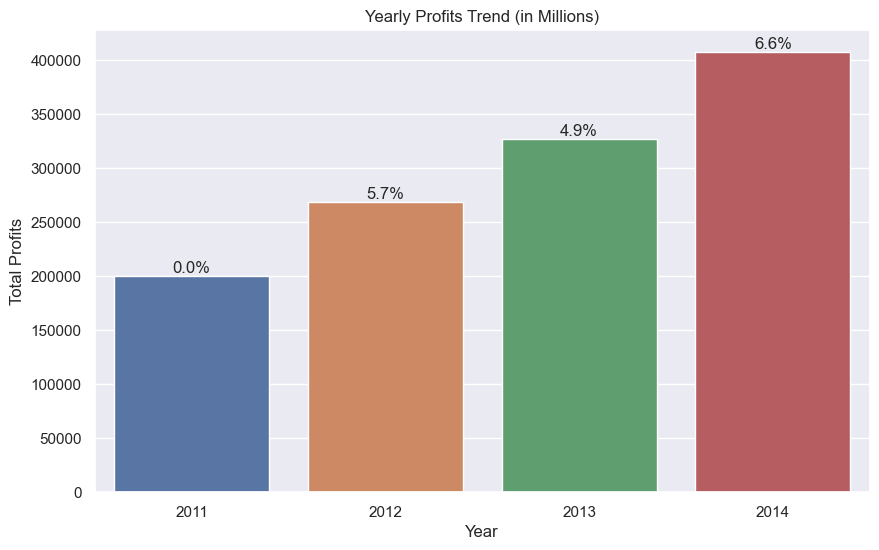

In [55]:
sns.set()
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='year', y='profit', data=yearly_profit)

# Thêm cột 'growth_percentage'
for index, row in yearly_profit.iterrows():
    ax.text(index, row['profit'], f'{row["growth_percentage"]:.1f}%', 
            ha='center', va='bottom', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Total Profits')
plt.title('Yearly Profits Trend (in Millions)')

plt.show()

Lợi nhuận tăng dần qua các năm 

#### Mối quan hệ giữa lợi nhuận và doanh số bán hàng theo tháng và theo năm ####

In [80]:
monthly_sales

,year,month,sales
0,2011,1,113522.0
1,2011,2,103848.0
2,2011,3,109272.0
3,2011,4,106303.0
4,2011,5,109625.0
5,2011,6,139571.0
6,2011,7,127569.0
7,2011,8,153147.0
8,2011,9,180252.0
9,2011,10,147244.0


In [81]:
yearly_sales

,year,sales
0,2011,1675056.0
1,2012,2062396.0
2,2013,2576606.0
3,2014,3216172.0


In [82]:
yearly_profit

,year,profit,percentage,growth_percentage
0,2011,200571.87772,16.652198,0.000000
1,2012,268752.45642,22.312795,5.660597
2,2013,327552.07598,27.194551,4.881756
3,2014,407600.46634,33.840456,6.645905


In [83]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')
df['year'] = df['order_date'].dt.year 
df['month'] = df['order_date'].dt.month
monthly_profit = df.groupby(['year', 'month'])['profit'].sum().reset_index()
print(monthly_profit)

    year  month       profit
0   2011      1  14400.54972
1   2011      2  13191.69286
2   2011      3  13918.56012
3   2011      4  10834.72344
4   2011      5  12882.61162
5   2011      6  16626.72550
6   2011      7  16329.04756
7   2011      8  16449.57614
8   2011      9  21223.01858
9   2011     10  20142.42780
10  2011     11  19572.41136
11  2011     12  25000.53302
12  2012      1  18852.86428
13  2012      2  14883.42404
14  2012      3  16523.64398
15  2012      4  17625.27542
16  2012      5  22190.67222
17  2012      6  25071.72302
18  2012      7  15775.49288
19  2012      8  24910.83016
20  2012      9  26874.99152
21  2012     10  27401.24258
22  2012     11  28006.26166
23  2012     12  30636.03466
24  2013      1  17207.33942
25  2013      2  17580.48576
26  2013      3  20799.77648
27  2013      4  21947.39794
28  2013      5  26841.52954
29  2013      6  35668.62020
30  2013      7  23120.72964
31  2013      8  31342.22628
32  2013      9  30906.95514
33  2013     1

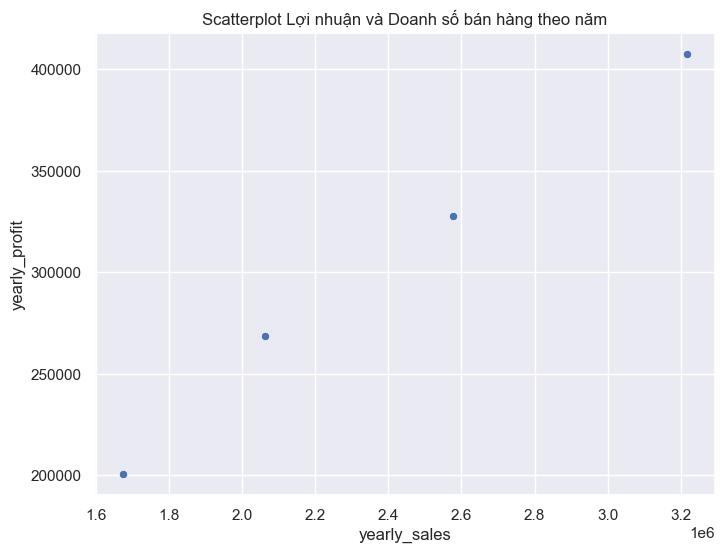

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=yearly_sales['sales'], y=yearly_profit['profit'])
plt.title('Scatterplot Lợi nhuận và Doanh số bán hàng theo năm')
plt.xlabel('yearly_sales')
plt.ylabel('yearly_profit')
plt.show()

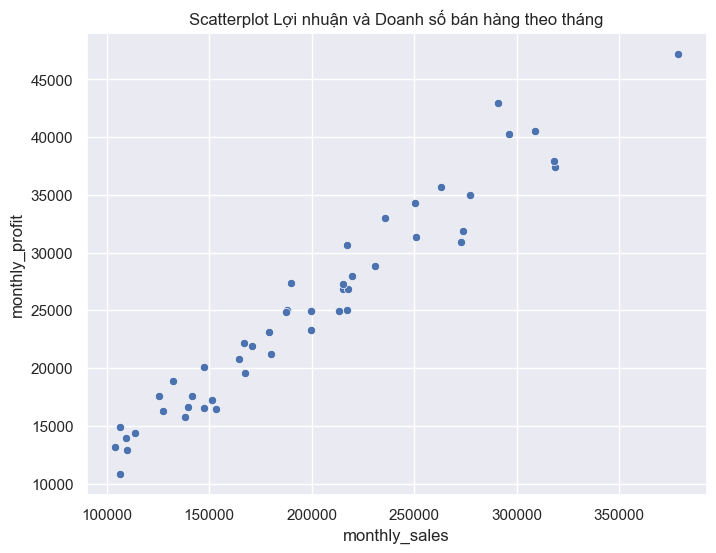

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=monthly_sales['sales'], y=monthly_profit['profit'])
plt.title('Scatterplot Lợi nhuận và Doanh số bán hàng theo tháng')
plt.xlabel('monthly_sales')
plt.ylabel('monthly_profit')
plt.show()

In [88]:
correlation = df['profit'].corr(df['sales'])
print(f'Hệ số tương quan Pearson giữa lợi nhuận và doanh số bán hàng: {correlation:.2f}')

Hệ số tương quan Pearson giữa lợi nhuận và doanh số bán hàng: 0.52


Kết luận : Dựa vào biểu đồ Scatter của doanh số và lợi nhuận theo tháng, theo năm và hệ số tương quan Pearson thì ta có thể thấy doanh số và lợi nhuận có mỗi quan hệ tương quan dương với nhau. Tức là nếu doanh số tăng thì lợi nhuận cũng tăng và ngược lại. Từ đó cũng đưa ra những chiến lược tối ưu hóa giá cả, chiến dịch tiếp thị, và quản lý tồn kho để đảm bảo lợi nhuận tối đa.

# 2. PRODUCT ANALYST  #

### 2.1 Loại sản phẩm nào bán được nhiều nhất? (Về số lượng)  ###

In [112]:
category_sold_quantity = df.groupby('category')['quantity'].sum().reset_index()
total_quantity = category_sold_quantity['quantity'].sum()
category_sold_quantity['percentage'] = (category_sold_quantity['quantity'] / total_quantity) * 100
category_sold_quantity = category_sold_quantity.sort_values(by='percentage', ascending=False)
category_sold_quantity

,category,quantity,percentage
1,Office Supplies,100864,62.279028
0,Furniture,30598,18.892902
2,Technology,30493,18.828070


### 2.2. Loại sản phẩm nào bán được nhiều nhất? (Tính theo doanh thu bán)  ###

In [114]:
category_sold_sales = df.groupby('category')['sales'].sum().reset_index()
total_sales = category_sold_sales['sales'].sum()
category_sold_sales['percentage'] = (category_sold_sales['sales'] / total_sales) * 100
category_sold_sales = category_sold_sales.sort_values(by='percentage', ascending=False)
category_sold_sales

,category,sales,percentage
2,Technology,3389177.0,35.562384
1,Office Supplies,3081593.0,32.334928
0,Furniture,3059460.0,32.102688


### 2.3 Xu hướng bán loại sản phẩm qua các năm về doanh thu và số lượng bán ra ###

In [116]:
df['year'] = df['order_date'].dt.year
product_sales = df.groupby(['category', 'year'])['sales'].sum().reset_index()
product_sales

,category,year,sales
0,Furniture,2011,551730.0
1,Furniture,2012,651017.0
2,Furniture,2013,854309.0
3,Furniture,2014,1002404.0
4,Office Supplies,2011,545574.0
5,Office Supplies,2012,657544.0
6,Office Supplies,2013,831307.0
7,Office Supplies,2014,1047168.0
8,Technology,2011,577752.0
9,Technology,2012,753835.0


In [117]:
df['year'] = df['order_date'].dt.year
product_qty = df.groupby(['category', 'year'])['quantity'].sum().reset_index()
product_qty

,category,year,quantity
0,Furniture,2011,5451
1,Furniture,2012,6487
2,Furniture,2013,8608
3,Furniture,2014,10052
4,Office Supplies,2011,17546
5,Office Supplies,2012,21638
6,Office Supplies,2013,27255
7,Office Supplies,2014,34425
8,Technology,2011,5356
9,Technology,2012,6642


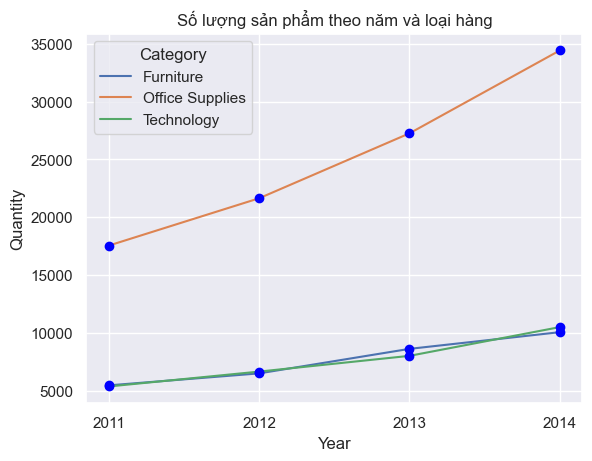

In [122]:
sns.lineplot(data=product_qty, x="year", y="quantity", hue="category")

for year in [2011, 2012, 2013, 2014]:
    data_subset = product_qty[product_qty['year'] == year]
    plt.scatter(data_subset['year'], data_subset['quantity'], color='blue', zorder=5)

plt.title("Số lượng sản phẩm bán theo năm và loại hàng")
plt.xlabel("Year")
plt.ylabel("Quantity")
plt.legend(title="Category")

plt.xticks([2011, 2012, 2013, 2014], ["2011", "2012", "2013", "2014"])

plt.show()

Về số lượng sản phẩm cho thấy rằng Office Supplies có số lượng bán cao nhất qua các năm

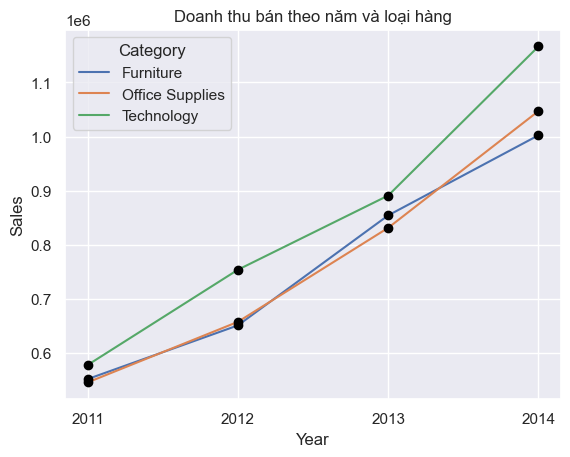

In [129]:
sns.lineplot(data=product_sales, x="year", y="sales", hue="category")

for year in [2011, 2012, 2013, 2014]:
    data_subset = product_sales[product_sales['year'] == year]
    plt.scatter(data_subset['year'], data_subset['sales'], color='black', zorder=5)

plt.title("Doanh thu bán theo năm và loại hàng")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Category")

plt.xticks([2011, 2012, 2013, 2014], ["2011", "2012", "2013", "2014"])

plt.show()

Về doanh thu thì ta lại thấy sản phẩm Technology có doanh thu bán cao hơn

Tuy số lượng bán Office Supplies cao hơn nhưng về doanh thu thì Technology có doanh thu cao hơn. Nên tập trung chú ý đưa ra chiến lược đẩy mạnh bán sản phẩm Technology và cũng lên kế hoạch khuyến mãi để đẩy mạnh bán các sản phẩm còn lại. Kết quả phân tích cũng cho thấy nên lập kế hoạch ra mắt sản phẩm mới phù hợp trong năm sau.